In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [2]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = edu["STATE"].unique()

for state in states:
    edu.loc[edu["STATE"] == state, fill_list] = edu.loc[edu["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
edu.dropna(inplace=True)

In [3]:
edu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
211,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,...,62793.0,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638
212,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,...,33855.0,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451
214,1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,...,52524.0,52269.0,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154


# Question 1

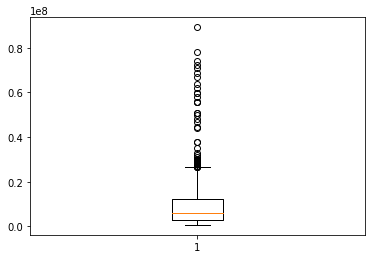

In [4]:
plt.boxplot(edu["TOTAL_REVENUE"])
plt.show()

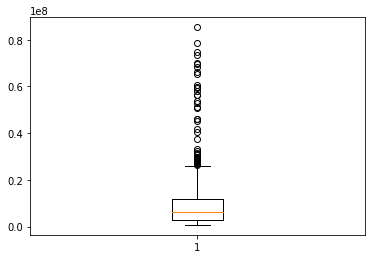

In [5]:
plt.boxplot(edu["TOTAL_EXPENDITURE"])
plt.show()

Both variables have outliers.

# Question 2

{'whiskers': [<matplotlib.lines.Line2D at 0x264c846a3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x264c846ac88>,
 'boxes': [<matplotlib.lines.Line2D at 0x264c846a278>],
 'medians': [<matplotlib.lines.Line2D at 0x264c8474518>],
 'fliers': [<matplotlib.lines.Line2D at 0x264c8474940>],
 'means': []}

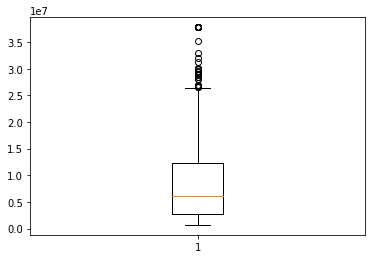

In [9]:
winsorized_revenue = winsorize(edu["TOTAL_REVENUE"], (0, 0.05))
plt.boxplot(winsorized_revenue)

In [10]:
winsorized_expenditure = winsorize(edu["TOTAL_EXPENDITURE"], (0, 0.05))

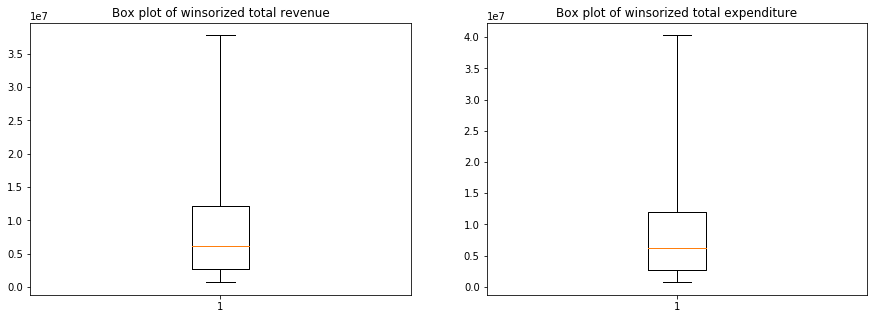

In [12]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue, whis = 5)
plt.title("Box plot of winsorized total revenue")

plt.subplot(1,2,2)
plt.boxplot(winsorized_expenditure, whis = 5)
plt.title("Box plot of winsorized total expenditure")
plt.show()

# Question 3

In [13]:
BUDGET_DEFICIT = edu.TOTAL_REVENUE - edu.TOTAL_EXPENDITURE

Text(0.5,1,'Box plot of budget deficit')

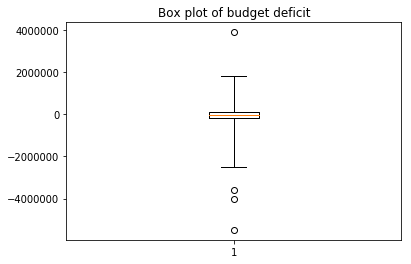

In [16]:
plt.boxplot(BUDGET_DEFICIT, whis = 10)
plt.title("Box plot of budget deficit")

In [17]:
winsorized_budget = winsorize(BUDGET_DEFICIT, (0.05, 0.05))

Text(0.5,1,'Box plot of budget deficit')

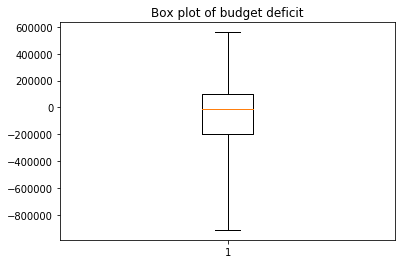

In [18]:
plt.boxplot(winsorized_budget, whis = 5)
plt.title("Box plot of budget deficit")

# Question 4

Text(0.5,1,'Box plot of budget deficit 2')

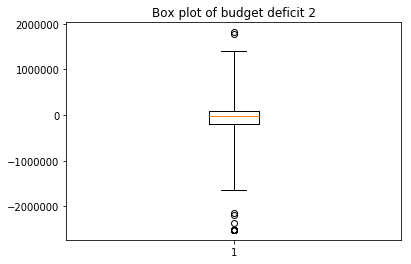

In [19]:
budget_deficit2 = winsorized_revenue - winsorized_expenditure
plt.boxplot(budget_deficit2, whis = 5)
plt.title("Box plot of budget deficit 2")

Text(0.5,1,'Box plot of budget deficit 2')

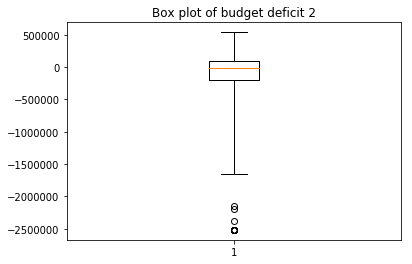

In [20]:
winsorized_budget2 = winsorize(budget_deficit2, (0.05, 0.05))
plt.boxplot(winsorized_budget2, whis = 5)
plt.title("Box plot of budget deficit 2")

# Question 5 

In [22]:
BUDGET_DEFICIT.describe()

count    4.660000e+02
mean    -8.094882e+04
std      6.144222e+05
min     -5.487742e+06
25%     -1.965748e+05
50%     -8.872500e+03
75%      1.013948e+05
max      3.897129e+06
dtype: float64

In [26]:
pd.DataFrame({"winsorized_budget": winsorized_budget,
              "winsorized_budget2": winsorized_budget2}).describe()

,winsorized_budget,winsorized_budget2
count,466.000000,4.660000e+02
mean,-58733.012876,-1.720532e+05
std,341300.816505,6.509561e+05
min,-913765.000000,-2.518429e+06
25%,-196574.750000,-2.047750e+05
50%,-8872.500000,-1.282350e+04
75%,101394.750000,9.826300e+04
max,560511.000000,5.400550e+05


# Question 6

I think the method in the third question is better.